In [1]:
import pandas as pd

In [ ]:
#To get the list of samples
f = open("/home/jimitcard/Desktop/OMR/sampled_1250/samples_1250_list.txt", "r")
samples=f.read().strip().split("\n")
print(len(samples))
f.close()

In [ ]:
#to get the vocabulary of samples
vocabulary=set({})
for sample in samples:
    if len(vocabulary)==60:
        break
    f = open("/home/jimitcard/Desktop/OMR/sampled_1250/"+sample+"/"+sample+".semantic", "r")
    notes=f.read().strip().split("\t")
    for note in notes:
        vocabulary.add(note)
print(len(vocabulary)) 

In [ ]:
vocabulary=list(vocabulary)
vocabulary

In [ ]:
#now create a pandas with samples and vocab and populate for frequency
sample_1250 = pd.DataFrame(index=samples, columns=vocabulary)
sample_1250 = sample_1250.fillna(0) # with 0s rather than NaNs
sample_1250.head()

In [ ]:
for sample in samples:
    f = open("/home/jimitcard/Desktop/OMR/sampled_1250/"+sample+"/"+sample+".semantic", "r")
    notes=f.read().strip().split("\t")
    for note in notes:
        sample_1250.loc[sample,note] +=1
sample_1250.head()

In [ ]:
frequency_of_notes=sample_1250.sum(numeric_only=True, axis = 0, skipna = True) 
sorted_frequency=frequency_of_notes.sort_values(axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')
sorted_frequency.describe()

In [63]:
sorted_frequency.tail(6)

note-Ab4_sixteenth    96
note-Eb4_eighth       95
note-C4_eighth        86
timeSignature-C/      80
multirest-1           75
tie                   59
dtype: int64

# Splitting the Dataset into Training and Testing

In [47]:
import random

random.shuffle(samples)
training_samples = samples[:1000]
testing_samples = samples[1000:]

## Training

In [ ]:
#now create a pandas with samples and vocab and populate for frequency
training_1000 = pd.DataFrame(index=samples, columns=vocabulary)
training_1000 = training_1000.fillna(0) # with 0s rather than NaNs
training_1000.head()
for sample in training_samples:
    f = open("/home/jimitcard/Desktop/OMR/sampled_1250/"+sample+"/"+sample+".semantic", "r")
    notes=f.read().strip().split("\t")
    for note in notes:
        training_1000.loc[sample,note] +=1
training_1000.head()

In [64]:
frequency_of_training_notes=training_1000.sum(numeric_only=True, axis = 0, skipna = True) 
sorted_frequency_of_training=frequency_of_training_notes.sort_values(axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')
sorted_frequency_of_training.tail(6)

note-Ab4_sixteenth    74
note-C4_eighth        71
timeSignature-C/      66
note-Eb4_eighth       63
multirest-1           62
tie                   49
dtype: int64

## Testing

In [ ]:
#now create a pandas with samples and vocab and populate for frequency
testing_250 = pd.DataFrame(index=samples, columns=vocabulary)
testing_250 = testing_250.fillna(0) # with 0s rather than NaNs
#testing_250.head()
for sample in testing_samples:
    f = open("/home/jimitcard/Desktop/OMR/sampled_1250/"+sample+"/"+sample+".semantic", "r")
    notes=f.read().strip().split("\t")
    for note in notes:
        testing_250.loc[sample,note] +=1
testing_250.head()

In [ ]:
frequency_of_testing_notes=testing_250.sum(numeric_only=True, axis = 0, skipna = True) 
sorted_frequency_of_testing=frequency_of_testing_notes.sort_values(axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')
sorted_frequency_of_testing.tail(15)

### Exporting training and testing samples

In [61]:
f = open("/home/jimitcard/Desktop/OMR/data/training.txt", 'w')
for sample in training_samples:
    f.write(sample+"\n")
f.close()

In [62]:
f = open("/home/jimitcard/Desktop/OMR/data/testing.txt", 'w')
for sample in testing_samples:
    f.write(sample+"\n")
f.close()

## Analyzing Training and Testing Dataset

In [69]:
print("sampled dataset")
print(sorted_frequency.describe())
print("\n")

print("training dataset")
print(sorted_frequency_of_training.describe())
print("\n")

print("testing dataset")
print(sorted_frequency_of_testing.describe())
print("\n")


sampled dataset
count      60.000000
mean      518.750000
std       640.590131
min        59.000000
25%       131.750000
50%       283.500000
75%       685.250000
max      4028.000000
dtype: float64


training dataset
count      60.000000
mean      413.400000
std       515.322548
min        49.000000
25%       107.000000
50%       219.500000
75%       536.750000
max      3240.000000
dtype: float64


testing dataset
count     60.000000
mean     105.350000
std      125.757613
min       10.000000
25%       26.750000
50%       62.000000
75%      147.000000
max      788.000000
dtype: float64




## Visualizations of Training and Testing Dataset

In [70]:
#plotting bar graph with bins of different colors
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

('Matplotlib version: ', '2.2.5')


In [71]:
SMALL_SIZE = 16
MEDIUM_SIZE = 9
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

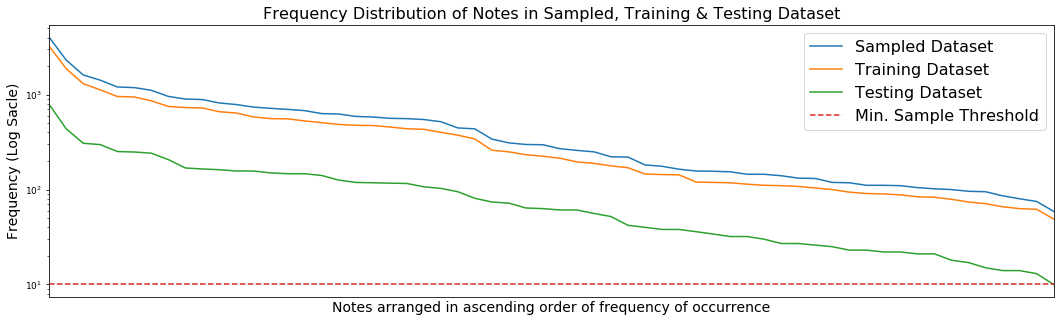

In [82]:
f, ax = plt.subplots(figsize=(18,5)) # set the size that you'd like (width, height)

sorted_frequency.plot(kind='line', label='Sampled Dataset')
sorted_frequency_of_training.plot(kind='line', label='Training Dataset')
sorted_frequency_of_testing.plot(kind='line', label='Testing Dataset')



plt.title('Frequency Distribution of Notes in Sampled, Training & Testing Dataset')
plt.ylabel('Frequency (Log Sacle)')
plt.xlabel('Notes arranged in ascending order of frequency of occurrence')
plt.xticks([])

plt.plot((0,60),(10,10),label="Min. Sample Threshold",linestyle='dashed')
plt.legend()
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.savefig('testing_training.png')
#plt.plot([5,0], [5,4500], 'k-')
plt.yscale('log')
#median
#10-90
plt.show()

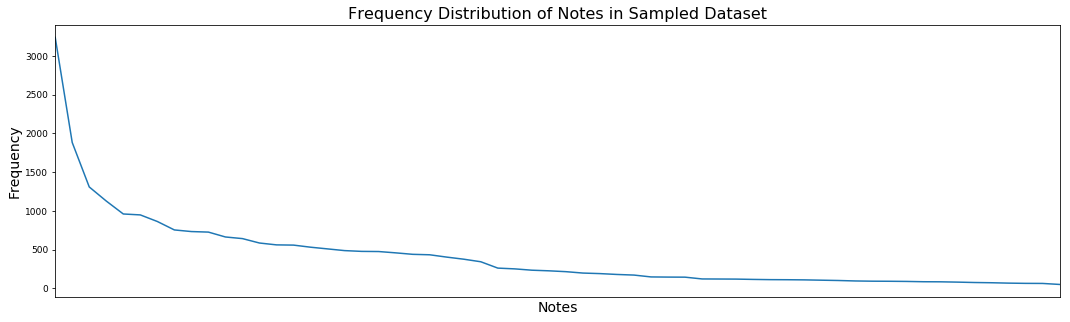

In [73]:
f, ax = plt.subplots(figsize=(18,5)) # set the size that you'd like (width, height)
sorted_frequency_of_training.plot(kind='line')

plt.title('Frequency Distribution of Notes in Sampled Dataset')
plt.ylabel('Frequency')
plt.xlabel('Notes')
plt.xticks([])

#plt.savefig('frequencyVsNotes.png')
#plt.plot([5,0], [5,4500], 'k-')
#plt.yscale('log')
#median
#10-90
plt.show()

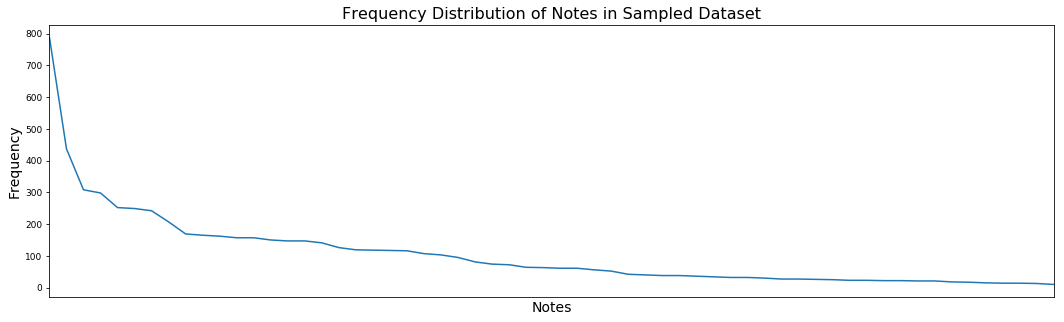

In [74]:
f, ax = plt.subplots(figsize=(18,5)) # set the size that you'd like (width, height)
sorted_frequency_of_testing.plot(kind='line')

plt.title('Frequency Distribution of Notes in Sampled Dataset')
plt.ylabel('Frequency')
plt.xlabel('Notes')
plt.xticks([])

#plt.savefig('frequencyVsNotes.png')
#plt.plot([5,0], [5,4500], 'k-')
#plt.yscale('log')
#median
#10-90
plt.show()